1) With given data sets apply Multiple Linear Regression and determine the appropriate regression
parameters using the concept of matrices and vectors representation of the regression variables and
parameters.
Also draw the scatter and regression plots for the given set of dependent and independent variables.

In [29]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [2]:
df = pd.read_csv("Salaries.csv")
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [3]:
df.isnull().sum()

Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [4]:
df = df.drop(columns=["Unnamed: 0"])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded.head()

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,False,True,True,True
1,20,16,173200,False,True,True,True
2,4,3,79750,True,False,True,True
3,45,39,115000,False,True,True,True
4,40,41,141500,False,True,True,True


In [6]:
X = df_encoded.drop(columns=["salary"])
Y = df_encoded["salary"]

In [13]:

test_sizes = [0.3, 0.4, 0.5]
for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    
    # Display the results
    print(f"Test Size: {test_size}")
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R²):", r2)
    print("\nCoefficients:\n", coefficients)
    print("\n" + "="*40 + "\n")

Test Size: 0.3
Mean Squared Error (MSE): 536520543.7312117
R-squared (R²): 0.33160243407020007

Coefficients:
                 Coefficient
yrs.since.phd    413.427954
yrs.service     -270.517390
rank_AsstProf -11626.610338
rank_Prof      33623.527399
discipline_B   16849.351266
sex_Male        4999.574946


Test Size: 0.4
Mean Squared Error (MSE): 521050700.6133962
R-squared (R²): 0.3518966925899282

Coefficients:
                 Coefficient
yrs.since.phd    665.697385
yrs.service     -443.689913
rank_AsstProf -11421.432643
rank_Prof      31944.575931
discipline_B   17416.732127
sex_Male        5606.590834


Test Size: 0.5
Mean Squared Error (MSE): 528776976.2387059
R-squared (R²): 0.3719379192364525

Coefficients:
                 Coefficient
yrs.since.phd    238.839424
yrs.service      -30.324182
rank_AsstProf -11917.830936
rank_Prof      33243.112964
discipline_B   17361.804890
sex_Male        3796.097386




In [14]:
model.score(X,Y)

0.4425787663428583

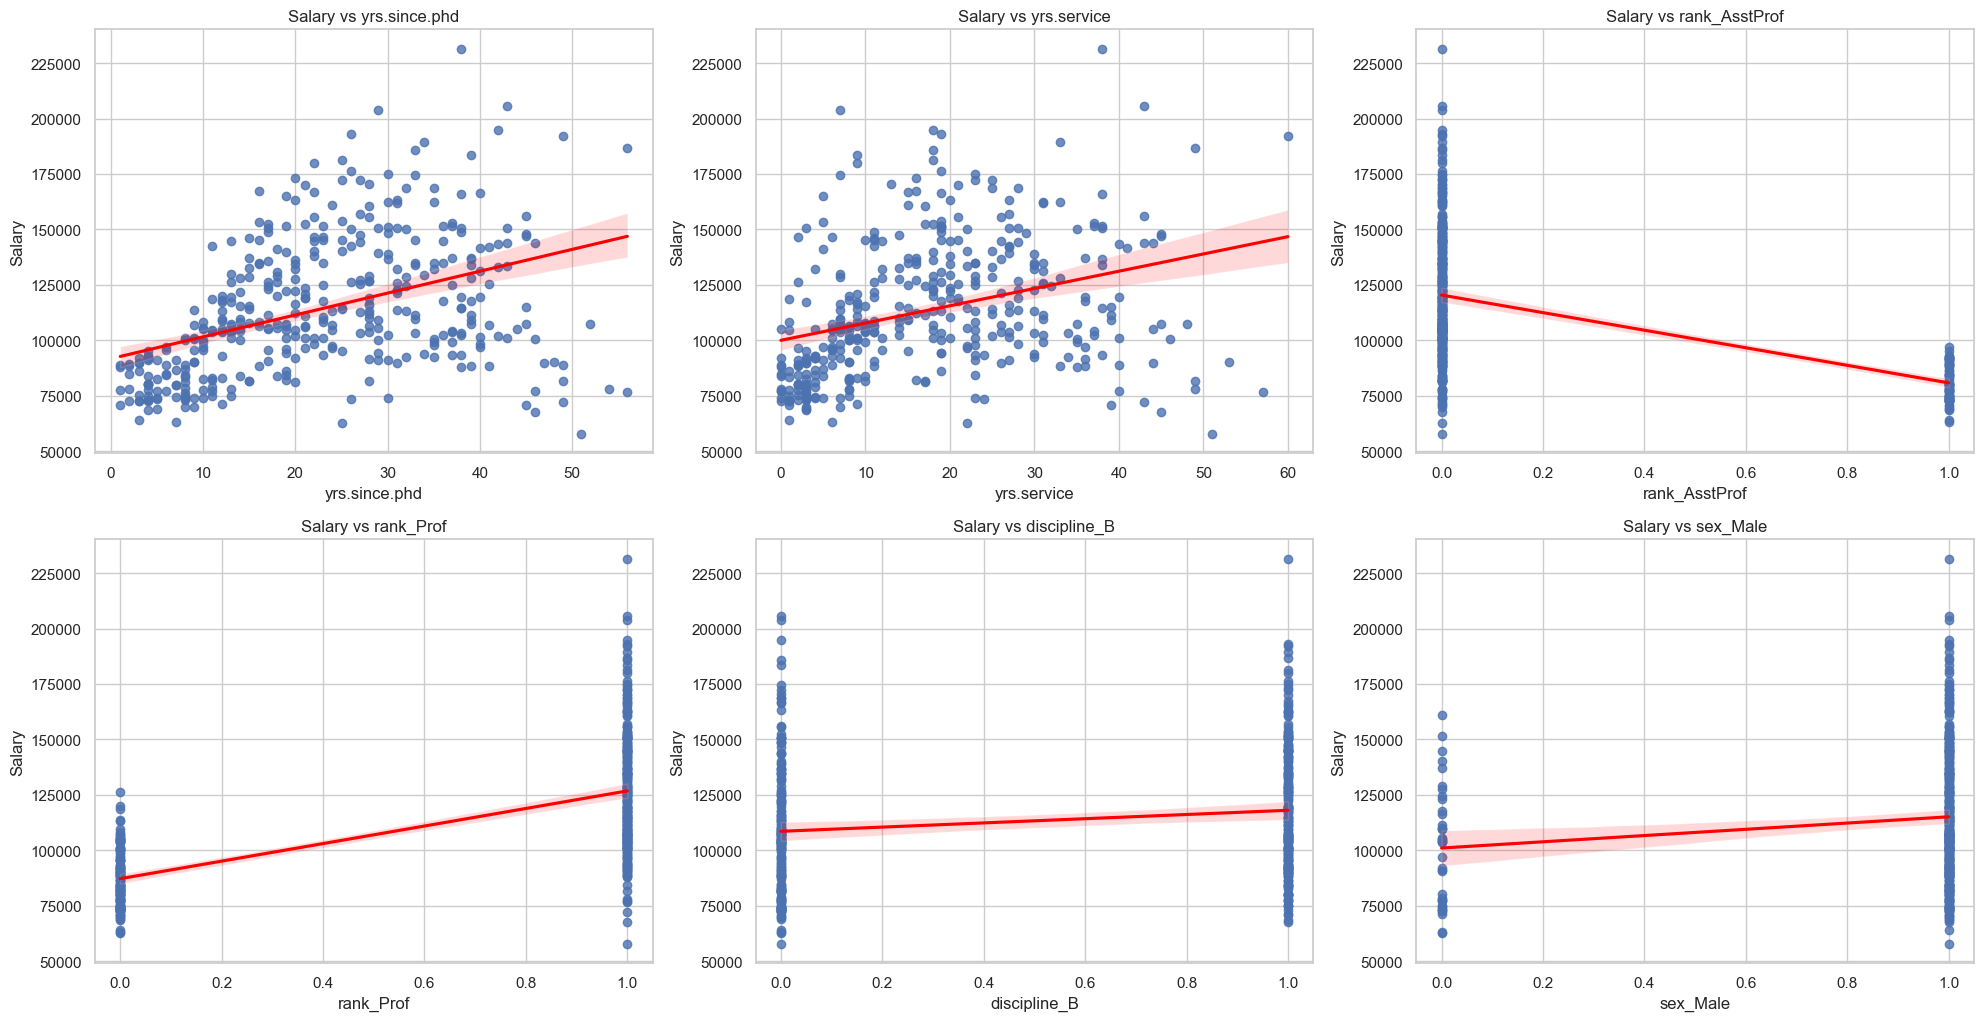

In [18]:
# Set the style of seaborn
sns.set(style="whitegrid")

# List of features
features = X.columns

# Create a figure and axes
plt.figure(figsize=(20, 15))

# Loop through each feature and plot
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=X[feature], y=Y, line_kws={"color":"red"})
    plt.title(f'Salary vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Salary')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

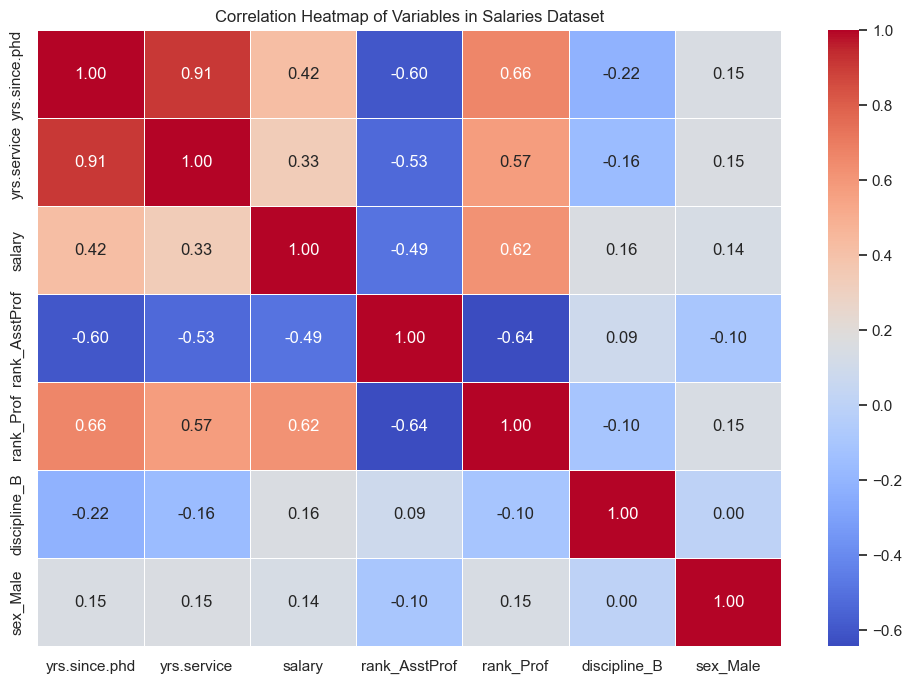

In [20]:
# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Variables in Salaries Dataset')

# Show the heatmap
plt.show()

2) With given data sets apply Logistic Regression and determine the appropriate regression
parameters.
Also draw the scatter and regression plots for the given set of dependent and independent variables.

In [24]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# Convert the 'smoker' column to binary (1 for 'yes', 0 for 'no')
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['smoker'])  # Drop 'smoker' from features
y = df['smoker']  # Target variable

# Convert other categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

In [30]:
test_sizes = [0.3, 0.4, 0.5]

for test_size in test_sizes:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Standardize the data (scaling)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create and train the Logistic Regression model with increased max_iter
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Test Size: {test_size}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Display the regression parameters (coefficients)
    coefficients = pd.DataFrame(model.coef_.reshape(-1, 1), index=X.columns, columns=['Coefficient'])
    print("\nCoefficients:\n", coefficients)
    print("\n" + "="*40 + "\n")

Test Size: 0.3
Confusion Matrix:
 [[313  10]
 [  4  75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       323
           1       0.88      0.95      0.91        79

    accuracy                           0.97       402
   macro avg       0.93      0.96      0.95       402
weighted avg       0.97      0.97      0.97       402


Coefficients:
                   Coefficient
age                 -1.219064
bmi                 -1.682111
children            -0.146759
charges              3.932212
sex_male             0.137144
region_northwest     0.040731
region_southeast     0.177376
region_southwest     0.026145


Test Size: 0.4
Confusion Matrix:
 [[413  17]
 [  2 104]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       430
           1       0.86      0.98      0.92       106

    accuracy                           0.96       536
   

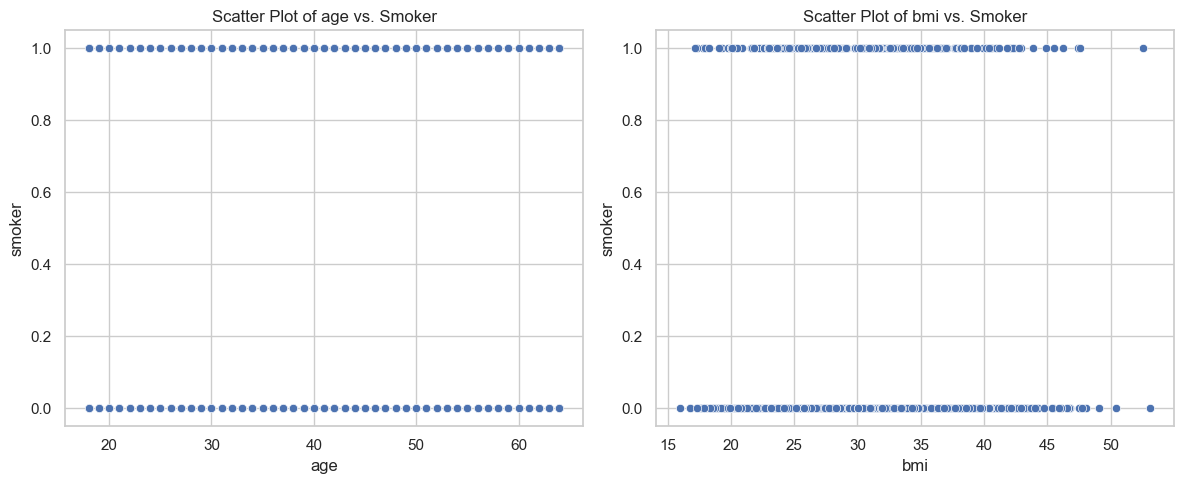

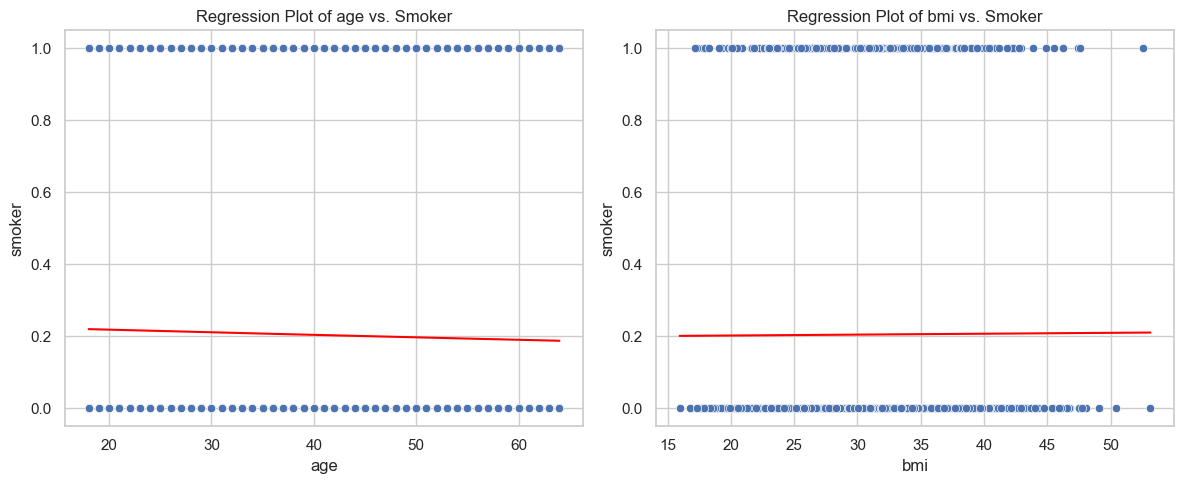

In [33]:
# Create a DataFrame for visualization
visual_df = X.copy()
visual_df['smoker'] = y

# List of independent variables to plot
independent_vars = ['age', 'bmi']  # Adjust as needed

# Create scatter plots
plt.figure(figsize=(12, 5))
for i, var in enumerate(independent_vars):
    plt.subplot(1, len(independent_vars), i + 1)
    sns.scatterplot(x=var, y='smoker', data=visual_df)
    plt.title(f'Scatter Plot of {var} vs. Smoker')

plt.tight_layout()
plt.show()

# Create regression plots manually
plt.figure(figsize=(12, 5))
for i, var in enumerate(independent_vars):
    plt.subplot(1, len(independent_vars), i + 1)
    
    # Fit a logistic regression model
    model = LogisticRegression(max_iter=200)
    X_var = visual_df[[var]]
    model.fit(X_var, visual_df['smoker'])
    
    # Plot the scatter points
    sns.scatterplot(x=var, y='smoker', data=visual_df)
    
    # Plot the logistic regression line
    x_range = pd.DataFrame({var: np.linspace(X_var[var].min(), X_var[var].max(), 300)})
    y_pred = model.predict_proba(x_range)[:, 1]
    plt.plot(x_range, y_pred, color='red')
    
    plt.title(f'Regression Plot of {var} vs. Smoker')

plt.tight_layout()
plt.show()

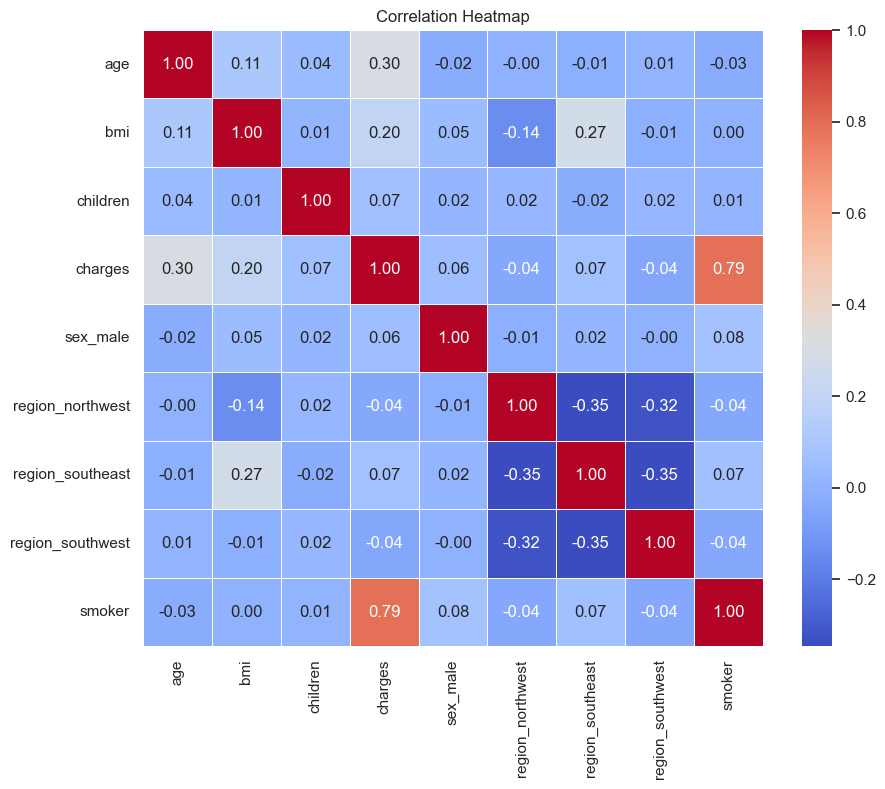

In [34]:
# Create a DataFrame for visualization
visual_df = X.copy()
visual_df['smoker'] = y

# Calculate the correlation matrix
corr_matrix = visual_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()